## K-means

In [74]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.simplefilter('ignore')

In [17]:
df = sns.load_dataset('iris')
y_col = 'species'
X = df.loc[:, df.columns!=y_col]
y = df[y_col]

In [10]:
# 標準化
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# K-means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_scaled)

In [14]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## 　K-meansの結果を描画使用

In [18]:
df['labels'] = labels
df

,sepal_length,sepal_width,petal_length,petal_width,species,labels
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


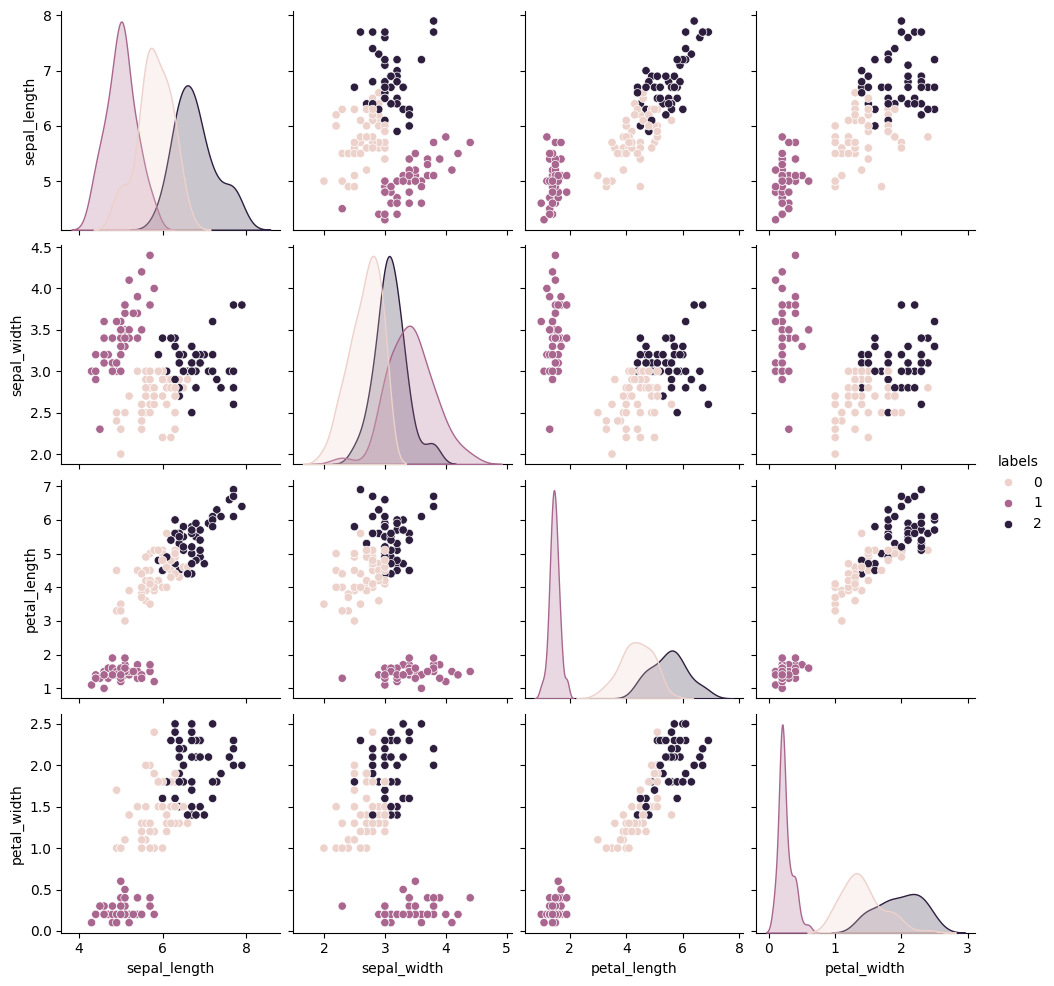

In [19]:
sns.pairplot(df, hue='labels')

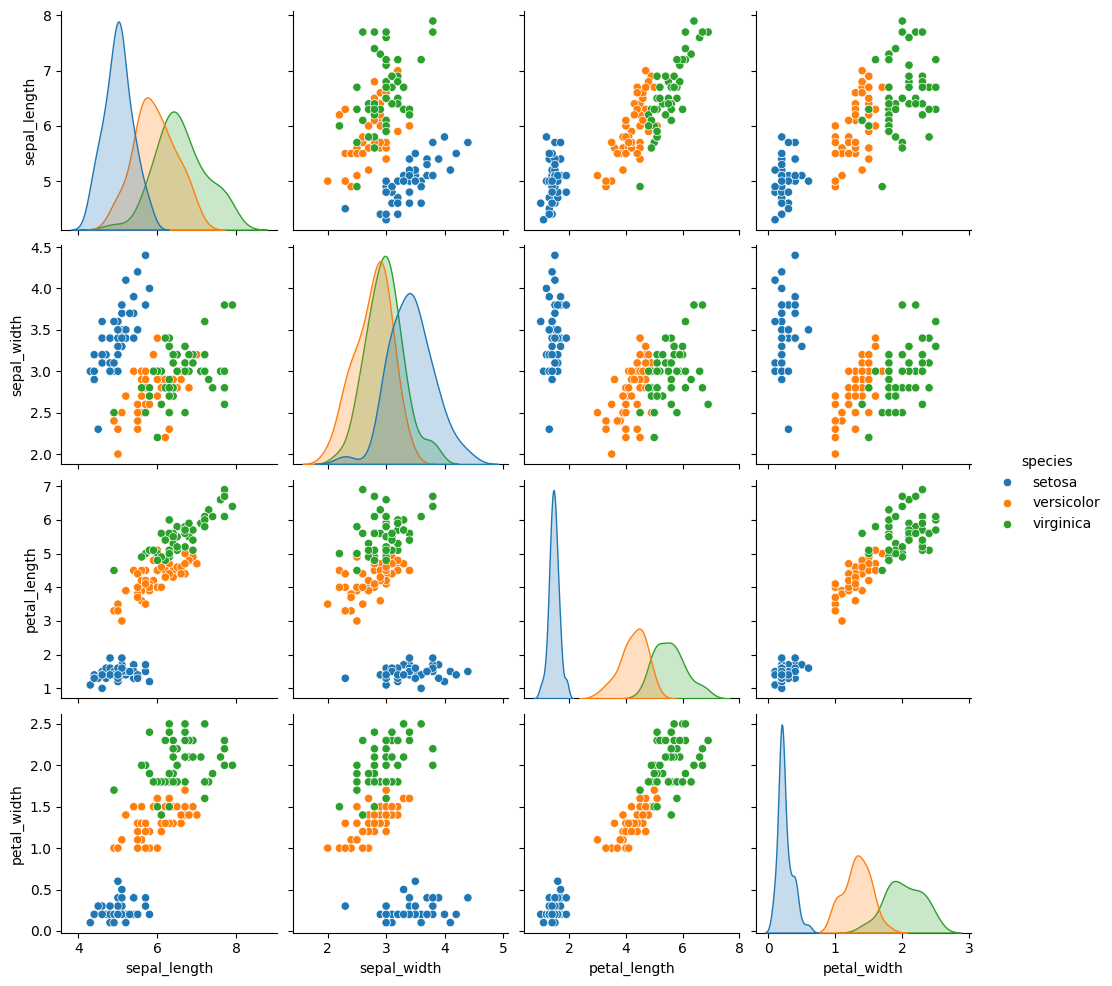

In [34]:
sns.pairplot(df.loc[:, df.columns!='labels'], hue='species')

In [35]:
k=9

score_list = []
for i in range(1,  k+1):
    kmean = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    score = kmean.score(X_scaled)
    score_list.append(-score)

Text(0, 0.5, 'loss')

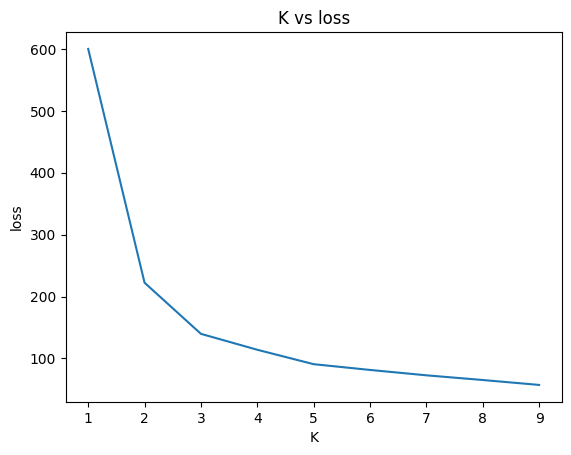

In [36]:
plt.plot(range(1, k+1), score_list)
plt.title('K vs loss')
plt.xlabel('K')
plt.ylabel('loss')

## 階層クラスタリング

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram
Z = linkage(X_scaled, method='ward')

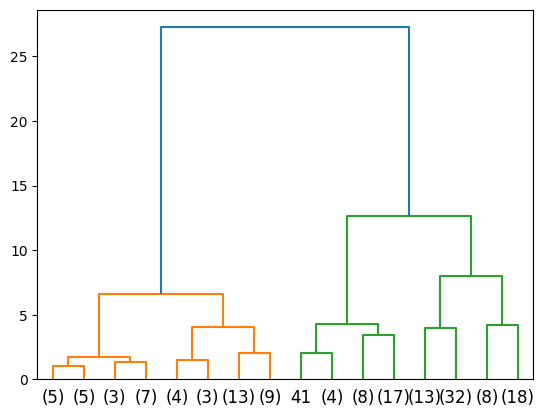

In [81]:
d = dendrogram(Z, truncate_mode='level', p=3)

## クラスタの分布描画

In [55]:
from scipy.cluster.hierarchy import fcluster
label = fcluster(Z, criterion='maxclust', t=3)

In [57]:
df = df.drop('labels', axis=1)

In [61]:
df_label = pd.DataFrame(label, columns=['cluster_label'])

In [86]:
df_cluster = X.join(df_label)
df_cluster.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster_label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


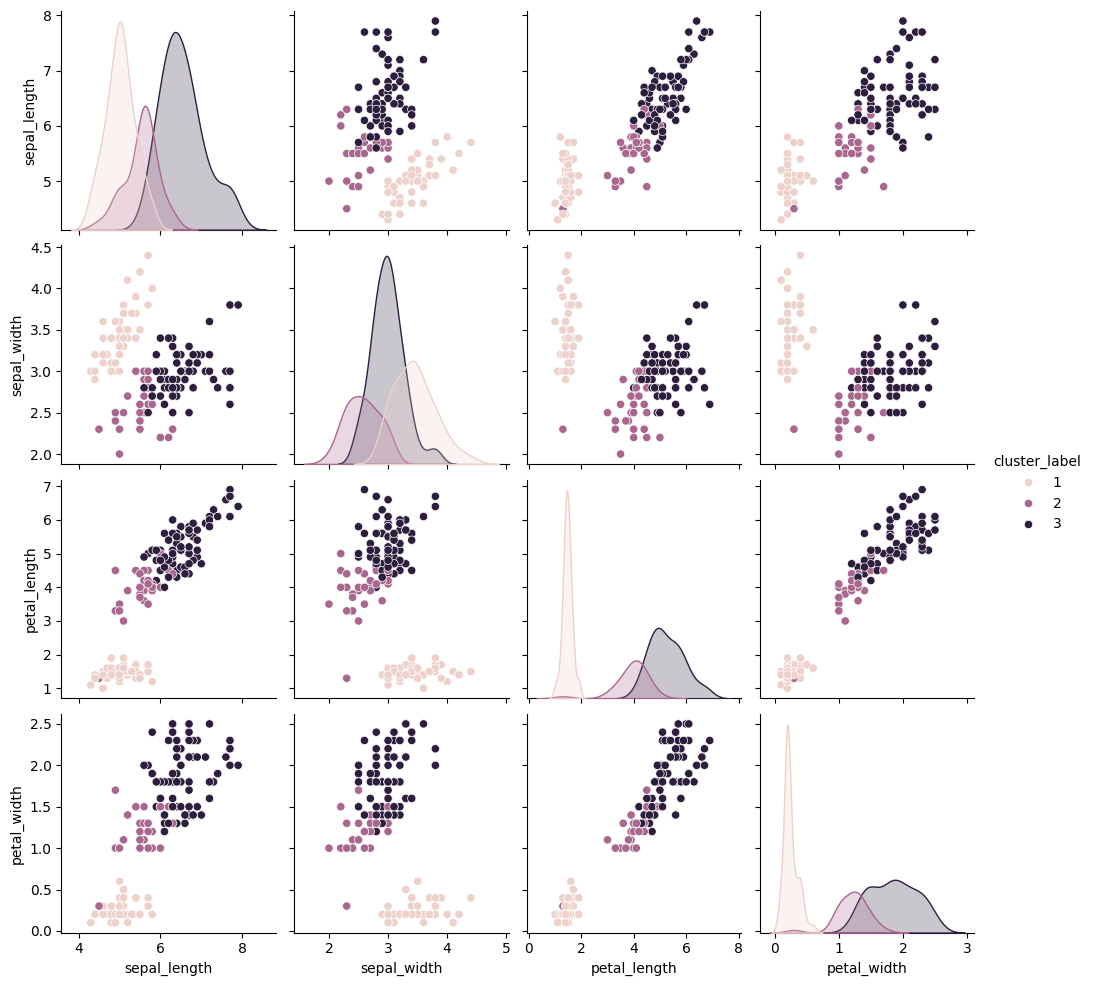

In [87]:
sns.pairplot(df_cluster, hue='cluster_label')